## 벡터화(vectorization) - 벡터 연산
- 같은 형태(shape)의 배열(벡터, 행렬)간의 연산은 같은 index의 원소끼리 연산을 한다. 
    - **Element-wise(원소별) 연산** 이라고도 한다.
    - 배열간의 연산시 배열의 형태가 같아야 한다.
    - 배열의 형태가 다른 경우 Broadcast 조건을 만족하면 연산이 가능하다.

### 벡터/행렬과 스칼라간 연산

$$
\begin{align}
x=
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
10 - x = 10 -
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
=
\begin{bmatrix}
10 - 1 \\
10 - 2 \\
10 - 3 \\
\end{bmatrix}
=
\begin{bmatrix}
9 \\
8 \\
7 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
10 \times
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
=
\begin{bmatrix}
10\times1 & 10\times2 \\
10\times3 & 10\times4 \\
\end{bmatrix}
=
\begin{bmatrix}
10 & 20 \\
30 & 40
\end{bmatrix}
\end{align}
$$

### 벡터/행렬의 연산
$$
\begin{align}
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
+
\begin{bmatrix}
10 \\
20 \\
30 \\
\end{bmatrix}
=
\begin{bmatrix}
1 + 10 \\
2 + 20 \\
3 + 30 \\
\end{bmatrix}
=
\begin{bmatrix}
11 \\
22 \\
33 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
-
\begin{bmatrix}
10 \\
20 \\
30 \\
\end{bmatrix}
=
\begin{bmatrix}
1 - 10 \\
2 - 20 \\
3 - 30 \\
\end{bmatrix}
=
\begin{bmatrix}
-9 \\
-18 \\
-27 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
+
\begin{bmatrix}
10 & 20 \\
30 & 40 \\
\end{bmatrix}
=
\begin{bmatrix}
1+10 & 2+20 \\
3+30 & 4+40
\end{bmatrix}
\end{align}
$$

In [1]:
import numpy as np

In [3]:
x = np.array([1, 2, 3])
print(10 - x)
print(10 * x)
print(10 / x)

[9 8 7]
[10 20 30]
[10.          5.          3.33333333]


In [6]:
print(x > 1.5)
print((x > 1) & (x < 2))

[False  True  True]
[False False False]


In [8]:
y = np.arange(6).reshape(2, 3)
print(y.shape)
y

(2, 3)


array([[0, 1, 2],
       [3, 4, 5]])

In [9]:
z = np.arange(2*2*4).reshape(2, 2, 4)
z.shape

(2, 2, 4)

In [10]:
z

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [12]:
r = z + 10
r.shape

(2, 2, 4)

In [13]:
r

array([[[10, 11, 12, 13],
        [14, 15, 16, 17]],

       [[18, 19, 20, 21],
        [22, 23, 24, 25]]])

- 배열간의 연산
- 피연산자인 배열들의 shape이 동일해야 연산이 가능
    - (2, 2, 5) + (2, 2, 5)

In [14]:
a = np.array([10, 20, 30])
b = np.array([100, 200, 300])
r = a + b
r

array([110, 220, 330])

In [15]:
c = np.array([1, 2, 3, 4])
a / c

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [17]:
a = np.arange(4 * 4 * 2).reshape(4, 4, 2)
b = np.arange(100, 132).reshape(4, 4, 2)

In [18]:
b ** a

array([[[          1,         101],
        [      10404,     1092727],
        [  116985856,  -122086263],
        [ 1179904576, -2089615005]],

       [[-1193213952,   859279629],
        [-1093385216,  1591520719],
        [          0,  -419621967],
        [ -713801728,  1257826171]],

       [[          0,  2093171253],
        [  224657408,   427820071],
        [          0,   925243993],
        [ -432013312, -2061422189]],

       [[          0,  1178063325],
        [   67108864, -1924641409],
        [          0,   958762625],
        [ 1073741824, -1349558869]]], dtype=int32)

## 내적 (Dot product)
- `@` 연산자 또는 `numpy.dot(벡터/행렬, 벡터/행렬)`  함수 사용
- ### 벡터간의 내적
    - 같은 index의 원소끼리 곱한뒤 결과를 모두 더한다.
    - 벡터간의 내적의 결과는 `스칼라`가 된다.
    - $ x \cdot y $ 또는 $x^T y$로 표현
    - 조건
        - 두 벡터의 차원(원소의개수)가 같아야 한다.
        - 앞의 벡터는 행벡터 뒤의 벡터는 열벡터 이어야 한다.
            - numpy 에서는 vector 끼리 연산시 앞의 벡터는 행벡터로 뒤의 벡터는 열벡터로 인식해 처리한다.

$$
\begin{align}
x =
\begin{bmatrix}
1 \\ 2 \\ 3 \\
\end{bmatrix}
,\;\;\;
y = 
\begin{bmatrix}
4 \\ 5 \\ 6 \\
\end{bmatrix} 
\end{align}
$$

$$
\begin{align}
x^T y = 
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
4 \\ 5 \\ 6 \\
\end{bmatrix} 
= 1 \times 4 + 2 \times 5 + 3 \times 6 = 32
\end{align}
$$

    - @ 또는 np.dot을 통해서 연산 가능하다.

In [19]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x @ y

32

In [20]:
np.dot(x,y)

32

### 행렬간의 내적
- 앞 행렬의 행과 뒤 행렬의 열간에 내적을 한다.
- 행렬과 행렬을 내적하면 그 결과는 행렬이 된다.
- 앞 행렬의 열수와 뒤 행렬의 행수가 같아야 한다.
- 내적의 결과의 형태(shape)는 앞행렬의 행수와 뒤 행렬의 열의 형태를 가진다.
    - (3 x 2)와 (2 x 5) = (3 x 5)
    - (1 x 5)와 (5 x 1) = (1 x 1)    

$$
\begin{align}
A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}
\end{align}
$$

$$
\begin{align}
B = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix}
\end{align}
$$

$$
\begin{align}
A\cdot B = \begin{bmatrix} 1\times 1 + 2\times 3 + 3 \times 5 & 1\times 2 + 2\times 4 + 3 \times 6  \\ 4\times 1 + 5\times 3 + 6 \times 5  & 4\times 2 + 5\times 4 + 6 \times 6  \end{bmatrix} = 
\begin{bmatrix} 22 & 28 \\ 49 & 64 \end{bmatrix}
\end{align}
$$

In [21]:
a = np.arange(1, 7).reshape(2, 3)
b = np.arange(1, 7).reshape(3, 2)
print(a.shape, b.shape)

a @ b

(2, 3) (3, 2)


array([[22, 28],
       [49, 64]])

In [22]:
np.dot(a, b)

array([[22, 28],
       [49, 64]])

### 내적 예시
#### 가중합
- 단가 : 사과-2000, 귤-1000, 배-10000
- 구매개수: 사과-10, 귤-5, 배-7
- 총금액

In [24]:
# 과일 단가
f = np.array([2000, 1000, 10000])
# 구매 개수
c = np.array([10, 5, 7])

total = c@f
total

95000

In [25]:
c2 = np.array([
    [10, 5, 7],
    [5, 10, 2],
    [20, 100, 10]
])
f2 = f[..., np.newaxis]
c2.shape, f2.shape

((3, 3), (3, 1))

In [26]:
c2 @ f2

array([[ 95000],
       [ 40000],
       [240000]])

# 범용함수(Ufunc, Universal function)
## 범용함수란
- 벡터화를 지원하는 넘파이 연산 함수들.
    - 유니버셜 뜻이 **"전체에 영향을 미치는"** 이다. 그래서 이 함수는 배열의 원소 전체에 영향을 미치는 기능을 제공하는 함수다.
    - 배열의 원소별로 연산을 처리하는 함수들
- 반복문을 사용해 연산하는 것 보다 `유니버셜 함수를 사용하는 것이 속도가 빠르다.`
- https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html

# 주요함수
## 단항 범용함수(unary ufunc)
- 매개변수로 한개의 배열을 받는다.
- 한 배열내의 원소별로 연산

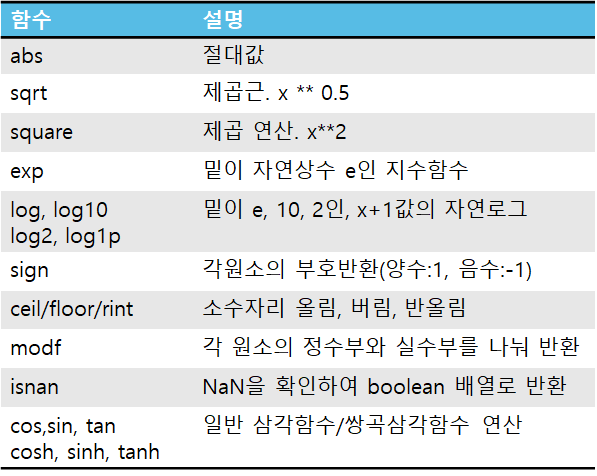

## 이항 범용함수
- 매개변수로 두개의 배열을 받는다.
- 두 배열의 같은 index 원소별로 연산

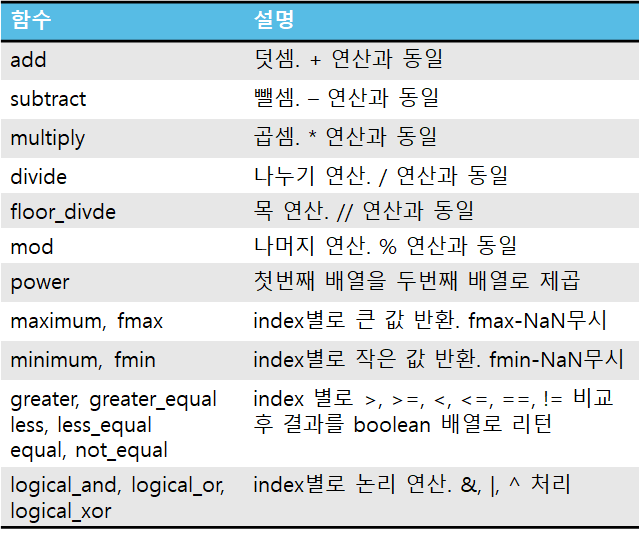

### Ufunc 예제
### 산술연산예제

In [27]:
x = np.arange(1, 6)
y = np.arange(11, 16)
x.shape, y.shape

((5,), (5,))

In [28]:
y

array([11, 12, 13, 14, 15])

In [29]:
x + y

array([12, 14, 16, 18, 20])

In [30]:
np.add(x, y)

array([12, 14, 16, 18, 20])

In [32]:
# 빼기
print(np.subtract(x, y))
# 몫연산
print(np.floor_divide(y, x), y//x)
# 나머지 연산
print(np.mod(y,x), y%x)

[-10 -10 -10 -10 -10]
[11  6  4  3  3] [11  6  4  3  3]
[0 0 1 2 0] [0 0 1 2 0]


In [33]:
print(np.maximum(x, y), np.minimum(x, y))

[11 12 13 14 15] [1 2 3 4 5]


In [34]:
x > y

array([False, False, False, False, False])

In [35]:
np.greater(x, y)

array([False, False, False, False, False])

In [36]:
print(x)
np.sqrt(x)

[1 2 3 4 5]


array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798])

In [37]:
np.square(x)

array([ 1,  4,  9, 16, 25], dtype=int32)

### 연산결과 출력 지정
- 연산결과를 특정 배열에 넣을 수있다.

In [38]:
result = np.zeros(5)
x, result

(array([1, 2, 3, 4, 5]), array([0., 0., 0., 0., 0.]))

In [39]:
r = np.square(x)
r

array([ 1,  4,  9, 16, 25], dtype=int32)

In [40]:
np.square(x, out=result)
result

array([ 1.,  4.,  9., 16., 25.])

## 누적연산함수 - reduce()
- 결과가 하나만 남을 때 까지 해당 연산을 배열의 모든 요소에 반복해서 적용
- 구문
    - np.**이항범용함수이름**.reduce(배열, axis=0)
- 처리결과의 축의개수(rank)는 하나 줄어 든다.
    - 1차원 -> 스칼라
    - 2차원 - 1차원
    - 3차원 - 2차원
    - n 차원 - n-1차원

In [41]:
x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [42]:
np.add.reduce(x)

55

In [43]:
np.subtract.reduce(x)

-53

In [44]:
y = x.reshape(2, 5)
y

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [45]:
y.shape

(2, 5)

In [47]:
np.add.reduce(y, axis=0)

array([ 7,  9, 11, 13, 15])

In [48]:
np.add.reduce(y, axis=1)

array([15, 40])

In [49]:
# flatten한 뒤 누적 계산
np.add.reduce(y, axis=None)

55

## 누적연산함수 - accumulate()
- 배열의 원소들에 해당연산을 누적해 적용
- 처리경과의 축의개수(rank)는 피연산자배열과 동일하다.
- 구문
    - np.**이항범용함수이름**.accumulate(배열, axis=0)

In [50]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55], dtype=int32)

In [52]:
y = np.arange(1, 16).reshape(3, 5)
y

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [53]:
np.add.accumulate(y, axis=0)

array([[ 1,  2,  3,  4,  5],
       [ 7,  9, 11, 13, 15],
       [18, 21, 24, 27, 30]], dtype=int32)

In [54]:
np.add.accumulate(y, axis=1)

array([[ 1,  3,  6, 10, 15],
       [ 6, 13, 21, 30, 40],
       [11, 23, 36, 50, 65]], dtype=int32)

## 기술통계함수
- 통계 결과를 계산해 주는 함수들
- 구문
    1. `np.전용함수(배열)`
        - np.sum(x)
    2. 일부는 `배열.전용함수()` 구문 지원
        - x.sum()
- 배열의 원소 중 누락된 값(NaN - Not a Number) 있을 경우 연산의 결과는 NaN으로 나온다.        
- 안전모드 함수
    - 배열내 누락된 값(NaN, 결측치)을 무시하고 계산
        
- https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.statistics.html

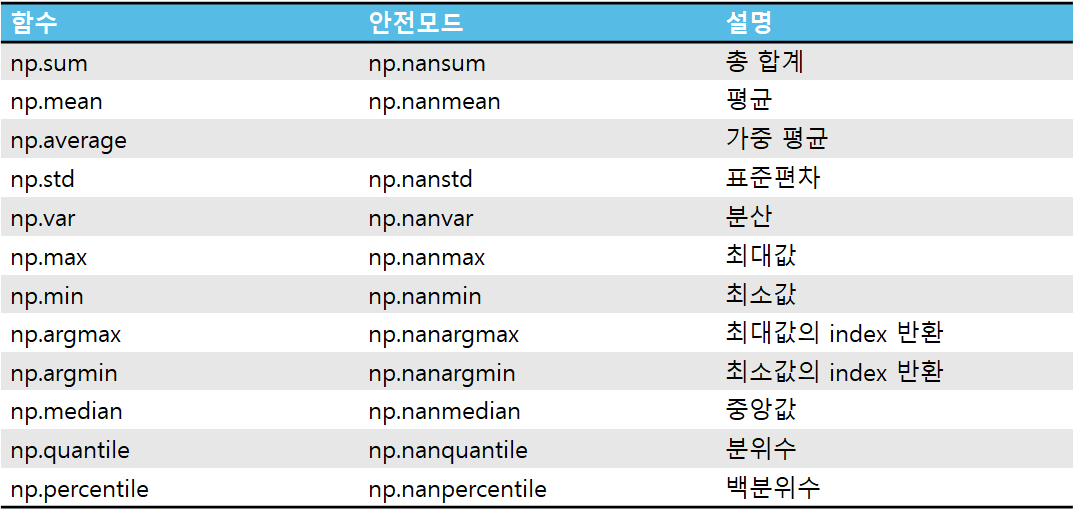

In [2]:
import numpy as np

In [2]:
np.random.seed(0)
arr = np.random.randint(100, size=10)
arr

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87])

In [12]:
print('합계 : ', np.sum(arr), arr.sum())
print('평균 : ', np.mean(arr), arr.mean())
print('표준편차 : ', np.std(arr), arr.std(), round(np.std(arr),2))
print('분산 : ', np.var(arr), arr.var())
print(np.sqrt(np.var(arr)))

print('최대값 : ', np.max(arr), arr.max())
print('최대값의 index : ', np.argmax(arr), arr.argmax())
print('최소값의 index : ', np.argmin(arr), arr.argmin())
# arr.median() 중앙값은 함수만 지원함
print('중앙값 : ', np.median(arr))

# 중앙값과 평균의 차이가 작을 경우 이상치가 없다고 판단한다.
# 하지만 차이가 크다면 이상치가 존재한다고 판단

합계 :  525 525
평균 :  52.5 52.5
표준편차 :  24.3567239176372 24.3567239176372 24.36
분산 :  593.25 593.25
24.3567239176372
최대값 :  87 87
최대값의 index :  9 9
최소값의 index :  5 5
중앙값 :  55.5


In [13]:
arr2 = np.append(arr, 10000)
arr2

array([   44,    47,    64,    67,    67,     9,    83,    21,    36,
          87, 10000])

In [14]:
np.mean(arr2), np.median(arr2)

(956.8181818181819, 64.0)

#### 평균과 중앙값의 차이가 클 경우
- 중앙값 < 평균
    - 전체적으로 데이터가 크고 이상치의 값이 작다
- 중앙값 > 평균
    - 전체적으로 데이터가 작고 이상치의 값이 크다

In [18]:
# 가중평균
grade1 = [80, 90, 100]
grade2 = [100, 90, 80]
print('평균: ', np.mean(grade1), np.mean(grade2))

# 과목별 가중치 생성
weight = [5, 5, 1]

# 가중평균
print('1번의 가중평균 : ', np.average(grade1, weights=weight))
print('2번의 가중평균 : ', np.average(grade2, weights=weight))

평균:  90.0 90.0
1번의 가중평균 :  86.36363636363636
2번의 가중평균 :  93.63636363636364


In [20]:
# 값과 가중치의 가중합 / 가중치합 = 가중평균
(np.array(grade1)@np.array(weight)) / np.sum(weight)

86.36363636363636

#### 안전모드 함수 예제

In [24]:
# 결측치 - np.nan
arr2 = np.arange(1, 10, dtype=np.float)
arr2[1], arr2[5] = np.nan, np.nan
arr2

array([ 1., nan,  3.,  4.,  5., nan,  7.,  8.,  9.])

In [25]:
# 결측치 확인 함수 - np.isnan(배열) : 원소별로 결측치인지 확인
# True: 결측치, False: 일반값
np.isnan(arr2) 

array([False,  True, False, False, False,  True, False, False, False])

In [27]:
# 결측치의 개수 확인
# True:1, False:0
np.sum(np.isnan(arr2))

2

In [28]:
np.mean(arr2)

nan

### 다차원 배열
- 통계함수들에 axis 매개변수 값을 지정해서 계산할 축을 지정한다.
- axis의 기본값 None. flatten() 한 뒤 계산 -> 전체 원솓르의 통계값을 계산

In [29]:
x = np.arange(1, 13).reshape(3, 4)
print(x.shape)
x

(3, 4)


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [30]:
# axis를 지정하지 않으면 전체 원소들에 대한 통계치를 계산
np.sum(x), np.mean(x)

(78, 6.5)

In [32]:
np.sum(x, axis=0), np.sum(x, axis=1)

(array([15, 18, 21, 24]), array([10, 26, 42]))

In [33]:
np.max(x, axis=0), np.max(x, axis=1)

(array([ 9, 10, 11, 12]), array([ 4,  8, 12]))

####  분위
- 분위수 구하는 이유
    - 집단의 소득을 예시로 든다면 상위 75%는 ~이상을 받는다와 같은 기준점을 잡기 위해서
- `np.quantile`(배열, q=분위, interpolation='')
    - 가장 많이 사용됨
    - 분위
        - 0~1 사이의 실수
        - 여러분위수를 조회할 경우는 list로 묶어서 전달
    - interpolation
        - lower, higher, midpoint(양값의 평균)
        - linear(default) : i + (j - i) 분위
- np.percentile(배열, q=분위)    
    - 분위
        - 0~100 사이 실수
        - 여러분위수를 조회할 경우는 list로 묶어서 전달
- 대표적인 분위수
    - 4분위(4등분) - 25%, 50%, 75%
    - 10분위(10등분) - 10%, 20%, 30%, 40%, 50%, ..., 100%
    - 100분위(100등분) - 1%, 2%, ..., 99%, 100%

In [23]:
a = np.random.permutation(np.arange(11))
a

array([ 8,  1,  7,  2,  9,  6,  0,  5,  4, 10,  3])

In [38]:
np.quantile(a, q=0.1), np.percentile(a, q=10)

(1.0, 1.0)

In [39]:
np.quantile(a, q=0.3), np.percentile(a, q=30)

(3.0, 3.0)

In [42]:
np.quantile(a, q=[0.1, 0.3, 0.7]), np.percentile(a, q=[10, 30, 70])

(array([1., 3., 7.]), array([1., 3., 7.]))

In [43]:
# 4분위
np.quantile(a, q=[0.25, 0.5, 0.78])

array([2.5, 5. , 7.8])

In [5]:
np.quantile(a, q=[0.25, 0.5, 0.75])

array([2.5, 5. , 7.5])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

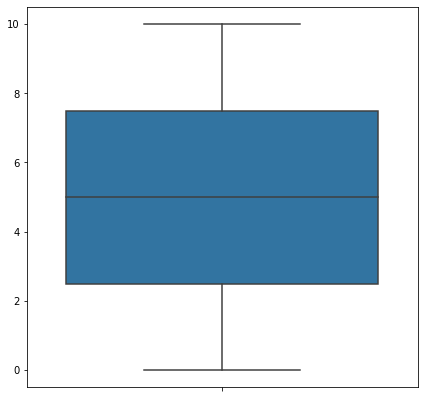

In [20]:
# 사이즈 지정
plt.figure(figsize=(7, 7))

# y=a를 통해 그래프를 수직으로 그린다.
sns.boxplot(y=a)
plt.show()

- **boxplot은 이상치, 극단치를 확인하기 좋은 그래프다.**
- 박스의 선
    - 박스의 border line은 전체의 0.25와 0.75를 표시한다.
    - 박스 가운데 줄은 2분위(0.5)를 뜻하는 표시다.(전체의 50%)
- 양 끝의 선(수염) 
    - 정상값중에 max or min
    - 이 범위를 넘어간 데이터는 이상치(극단치, 극단값)이다.

In [24]:
a = np.append(a, [50, -30])
a

array([  8,   1,   7,   2,   9,   6,   0,   5,   4,  10,   3,  50, -30])

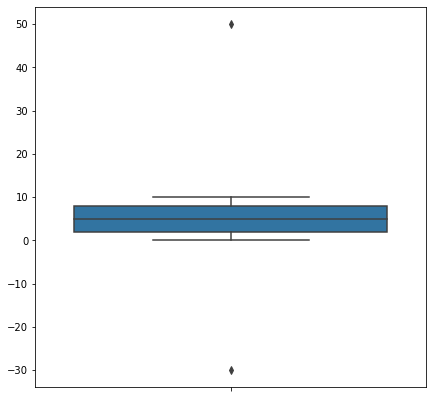

In [25]:
# 사이즈 지정
plt.figure(figsize=(7, 7))

# y=a를 통해 그래프를 수직으로 그린다.
sns.boxplot(y=a)
plt.show()

- 박스 안에 존재하는 데이터는 정상 데이터라고 생각하면 된다.
- 수염을 벗어난 50, -30을 극단치(이상치)라고 생각하면 된다.

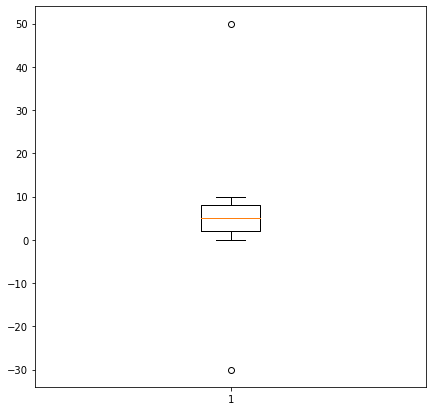

In [27]:
plt.figure(figsize=(7, 7))
plt.boxplot(a)
plt.show()

- IQR = 3분위 - 1분위
    - 극단적으로 큰 값 : `3분위 + IQR * 1.5`보다 큰 값
    - 극단적으로 작은 값 : `1분위 - IQR * 1.5`보다 작은 값
- IQR에 1.5를  곱하는 이유
    - 그냥 공식이라고 생각하자
    - 극단치를 체크하는 범위를 넓히고 싶다면 더 큰 수로 바꾸면 된다.

# 브로드 캐스팅
- 사전적의미 : 퍼트린다. 전파한다. 
- 형태(shape)가 다른 배열 연산시 배열의 형태를 맞춰 연산이 가능하도록 한다.
    - 모든 형태를 다 맞추는 것은 아니고 조건이 맞아야 한다.
- 조건
    1. 두 배열의 축의 개수가 다르면 작은 축의개수를 가진 배열의 형태(shape)의 앞쪽을 1로 채운다.
        - (2, 3)  + (3, ) => (2, 3) + (1, 3)
        - (2, 3) + (5, 2) => 불가능
        - (2, 3) + (6, 3) => 불가능
        - 달라도 되지만 하나는 무조건 dummy축이어야 한다.
    2. 두 배열의 차원 수가 같지만 각 차원의 크기가 다른 경우 어느 한 쪽에 1이 있으면 그 1이 다른 배열의 크기와 일치하도록 늘어난다.
         - 1 이외의 나머지 축의 크기는 같아야 한다.
         - 늘리면서 원소는 복사한다.
         - (2, 3) + (3, ) => (2, 3) + (1, 3) => (2, 3) + (2, 3)
         - (3, 1)+(3,) => (3, 1)+(1, 3) => (3, 3)+(3, 3)
         - (2, 3, 6)+(6,) => (2, 3, 6)+(1, 1, 6) => (2, 3, 6)+(2, 3, 6)

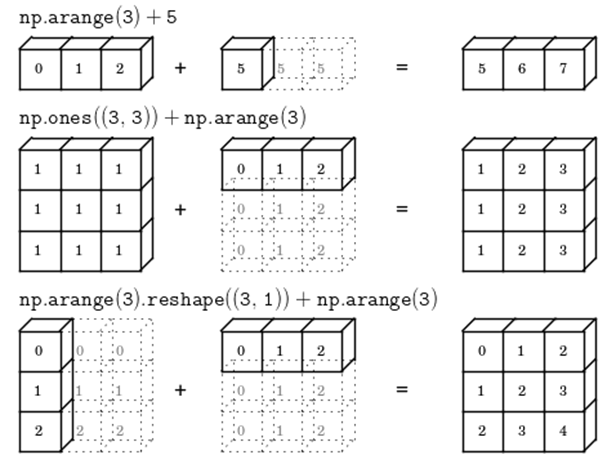

In [29]:
x = np.array([1, 2, 3])
y = np.array([1, 2])
print(x.shape, y.shape)
x + y

(3,) (2,)


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [31]:
z = np.array([10])
print(x.shape, z.shape)
x + z

(3,) (1,)


array([11, 12, 13])

In [32]:
a = np.arange(6).reshape(2, 3)
b = np.arange(6).reshape(3, 2)
print(a.shape, b.shape)
a + b

(2, 3) (3, 2)


ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [35]:
c = np.arange(3).reshape(1, 3)
print(a.shape, c.shape)
print('a : ',a)
print('c : ',c)
a + c

(2, 3) (1, 3)
a :  [[0 1 2]
 [3 4 5]]
c :  [[0 1 2]]


array([[0, 2, 4],
       [3, 5, 7]])

In [37]:
m = np.arange(2*3*6).reshape(2, 3, 6)
n = np.arange(6)

m+n

array([[[ 0,  2,  4,  6,  8, 10],
        [ 6,  8, 10, 12, 14, 16],
        [12, 14, 16, 18, 20, 22]],

       [[18, 20, 22, 24, 26, 28],
        [24, 26, 28, 30, 32, 34],
        [30, 32, 34, 36, 38, 40]]])